<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
<center> <h3><b> M7 - U1 Algoritmos Supervisados</h3></b> </center>
<center> <h4><b>Ejercicio Entregable: Electrocardiograma</h4></b> </center>



El caso práctico consiste en encontrar un modelo supervisado capaz de clasificar correctamente el conjunto de datos `data_reto.csv`.

Para esto, te pedimos que entrenes distintas familias de modelos supervisados (vistas en esta unidad), donde en el caso de que sea posible presenta al menos 2 configuraciones distintas de la misma familia. Por ejemplo, 2 modelos de SVM cambiando el hiperparámetro C en la configuración.

Datos: `data_reto.csv`, `data_onu.csv`

**Variables**

El dataset consiste en un conjunto de 30 parámetros calculados a partir del Electrocardiograma (ECG). Estos parámetros, recogen distintas características del ECG, desde su comportamiento temporal como a amplitud, pendiente, etc. Hasta carácterísticas un poco más complejas como variables espectrales. A continuación, se muestra la lista completa de parámetros:

**Parámetros temporales**

* TCI = threshold crossing interval

* TCSC = threshold crossing sample count

* Exp = exponencial estandard

* Expmod = exponencial modificada

* MAV = valor medio absoluto

* count1

* count2

* count3

* x1

* x2

* bCP

**Parámetros espectrales**

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Parámetros de tipo tiempo-frecuencia**

* Li = basada en el análisis de ondas del ECG.

**Parámetros de complejidad del ECG**

* CM = medida de la complejidad

* CVbin = covarianza

* abin = area

* Frqbin = frecuencia

* Kurt = Curtosis de una señal binaria extraída del ECG

* PSR = La reconstrucción del espacio de fase

* HILB = La transformación de Hilbert

* SamEn = Muestra de entropía



**Variable dependiente**

La variable que utilizaremos para clasificar los datos será **VF**. Donde:
- 0 nos indica que la persona está sana
- 1 nos indica que la persona tiene una Fibrilación Ventricular (VF).



# **Importar las librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

plt.style.use('ggplot')

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Verificar la importación de XGBoost
import xgboost
print("XGBoost version:", xgboost.__version__)

XGBoost version: 2.1.4


# **Cargar el dataset**

In [4]:
df = pd.read_csv("/Users/maruxamoreiraperez/Python/MaruPython/clases julio/modulo 7/case to be solve/supervisado/data_reto.csv", header=0)
df.shape

(9146, 31)

In [8]:
print("Primeras 5 filas:")
df.head()

Primeras 5 filas:


,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,...,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,...,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,...,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,...,0.50644,0.003233,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,...,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


In [10]:
# Veamos la distribución de la variable objetivo
print("\nDistribución de la variable objetivo (VF):")
print(df['VF'].value_counts(normalize=True))


Distribución de la variable objetivo (VF):
VF
0    0.829871
1    0.170129
Name: proportion, dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

In [24]:
df.dtypes

TCI       float64
TCSC      float64
exp         int64
expmod      int64
cm        float64
cvbin     float64
frqbin    float64
abin        int64
kurt      float64
vfleak    float64
M         float64
A1        float64
A2        float64
A3        float64
mav       float64
psr       float64
hilb      float64
SamEn     float64
x3        float64
x4          int64
x5        float64
x1        float64
x2        float64
bCP       float64
bWT       float64
bW        float64
Li        float64
count1    float64
count2    float64
count3    float64
VF          int64
dtype: object

ANÁLISIS INICIAL DEL DATASET ECG:

1. Estructura del Dataset:
   - Tamaño: 9146 registros y 31 columnas
   - No hay valores nulos en ninguna variable
   - Tipos de datos: 26 float64 y 5 int64 (entre ellos la VF)
2. Variables predictoras --> 30
3. Variable Objetivo (VF):
   - Variable binaria (0: normal, 1: fibrilación ventricular)
   - Distribución de clases:
     * Clase 0: 82.99% (ritmo normal)
     * Clase 1: 17.01% (fibrilación ventricular)
   - Hay más casos de ritmo normal que de fibrilación ventricular lo que puede ser algo normal en el contexto médico. Analizaremos si es necesario balancear.

In [ ]:
# Verificación de valores nulos por columna

In [16]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
TCI       0
TCSC      0
exp       0
expmod    0
cm        0
cvbin     0
frqbin    0
abin      0
kurt      0
vfleak    0
M         0
A1        0
A2        0
A3        0
mav       0
psr       0
hilb      0
SamEn     0
x3        0
x4        0
x5        0
x1        0
x2        0
bCP       0
bWT       0
bW        0
Li        0
count1    0
count2    0
count3    0
VF        0
dtype: int64


No hay valores nulos

In [14]:
# Identificación de valores únicos
df.nunique().sort_values()

VF           2
expmod      25
exp         31
x4          31
cm          34
frqbin      34
x5          72
psr        133
hilb       150
bW         181
count1     232
count2     297
bCP        457
cvbin      481
abin       484
TCSC      1126
A1        7958
vfleak    8028
SamEn     8047
TCI       8093
A3        8117
mav       8170
M         8175
A2        8266
count3    8428
x1        8515
bWT       8532
Li        8692
kurt      8810
x2        8848
x3        8918
dtype: int64

In [22]:
# Valores duplicados
df.duplicated().sum()

0

No hay valores nulos en ninguna columna ni valores duplicados lo que facilita nuestro análisis ya que no necesitamos realizar tratamiento 
de datos faltantes ni eliminar registros repetidos.

In [26]:
# Verificar valores únicos en algunas variables para observar si podemos considerar alguna como categórica
for col in ['exp', 'expmod', 'frqbin', 'VF']:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en exp: [ 60 120  90   0  75 150  30  45 135 105 180 195 165  15 315 255 270 300
 285 210 225 240 345 375 360 420 390 330 435 450 405]
Valores únicos en expmod: [135 150 180 120 165 105 210 195  90 225 285 240 255  60  75 270 300 315
 330 345  30  45  15 360 375]
Valores únicos en frqbin: [1.75 2.25 3.   2.   2.5  2.75 3.5  3.25 5.   4.25 1.5  1.25 0.75 1.
 3.75 4.   4.5  5.5  5.25 4.75 6.25 5.75 6.   7.5  7.   7.25 6.5  6.75
 0.5  0.25 0.   7.75 8.25 8.75]
Valores únicos en VF: [0 1]


In [ ]:
Las variables son numéricas en formato y significado y no necesitamos separar las variables en numéricas y categóricas

In [32]:
# Definir el número de desviaciones típicas
num_desv_tip = 4

# Función para identificar atípicos por desviación típica
def atip_desv_tip(variable, num_desv_tip=4):
    variable = variable.dropna()
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    indices = [indice for indice, valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

In [34]:
# Función para contar y mostrar atípicos
def conteo_atip(df, variable, num_desv_tip=4):
    atipicos = atip_desv_tip(df[variable], num_desv_tip)
    print(f'{variable}: % de Observaciones fuera de límites: {len(atipicos) / df.shape[0] * 100:.2f}%')
    return(df.loc[atipicos, variable].value_counts())

In [36]:
# Aplicar a todas las variables numéricas excepto la variable objetivo
for variable in df.columns:
    if variable != 'VF':  # Excluimos la variable objetivo
        conteo_atip(df, variable, num_desv_tip)

TCI: % de Observaciones fuera de límites: 0.09%
TCSC: % de Observaciones fuera de límites: 0.00%
exp: % de Observaciones fuera de límites: 0.23%
expmod: % de Observaciones fuera de límites: 0.00%
cm: % de Observaciones fuera de límites: 0.00%
cvbin: % de Observaciones fuera de límites: 0.00%
frqbin: % de Observaciones fuera de límites: 0.02%
abin: % de Observaciones fuera de límites: 0.00%
kurt: % de Observaciones fuera de límites: 0.05%
vfleak: % de Observaciones fuera de límites: 0.00%
M: % de Observaciones fuera de límites: 0.21%
A1: % de Observaciones fuera de límites: 0.47%
A2: % de Observaciones fuera de límites: 0.03%
A3: % de Observaciones fuera de límites: 0.00%
mav: % de Observaciones fuera de límites: 0.02%
psr: % de Observaciones fuera de límites: 0.00%
hilb: % de Observaciones fuera de límites: 0.00%
SamEn: % de Observaciones fuera de límites: 0.00%
x3: % de Observaciones fuera de límites: 1.40%
x4: % de Observaciones fuera de límites: 0.00%
x5: % de Observaciones fuera de

Algunas variables tienen un porcentaje significativo de valores atípicos, mientras que otras no.

Nos enfocaremos en aquellas variables con más del 0.2% de atípicos para decidir cómo manejarlos, ya que esto puede mejorar la calidad del modelo y asegurar que los atípicos no afecten negativamente el análisis.

In [40]:
# Filtrar y mostrar solo las variables con más del 0.5% de atípicos
for variable in df.columns:
    if variable != 'VF':  # Excluimos la variable objetivo
        porcentaje_atipicos = len(atip_desv_tip(df[variable], num_desv_tip)) / df.shape[0] * 100
        if porcentaje_atipicos > 0.2:
            print(f'{variable}: % de Observaciones fuera de límites: {porcentaje_atipicos:.2f}%')

exp: % de Observaciones fuera de límites: 0.23%
M: % de Observaciones fuera de límites: 0.21%
A1: % de Observaciones fuera de límites: 0.47%
x3: % de Observaciones fuera de límites: 1.40%
x5: % de Observaciones fuera de límites: 0.32%
count1: % de Observaciones fuera de límites: 0.50%
count3: % de Observaciones fuera de límites: 0.85%




# **EDA**


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TCI,9146.0,504.320221,262.511975,121.520000,297.872500,436.110000,631.140000,1861.20000
TCSC,9146.0,26.311054,20.286627,2.266700,10.533000,17.333000,42.450250,83.86700
exp,9146.0,86.337743,74.512381,0.000000,30.000000,75.000000,120.000000,450.00000
expmod,9146.0,145.712880,66.011499,15.000000,90.000000,135.000000,195.000000,375.00000
cm,9146.0,0.153696,0.055616,0.029897,0.109620,0.149490,0.189350,0.35877
cvbin,9146.0,0.182451,0.063978,0.015760,0.152180,0.202680,0.234860,0.25025
frqbin,9146.0,2.793489,1.310632,0.000000,1.750000,2.500000,3.750000,8.75000
abin,9146.0,727.499344,126.400750,500.000000,624.000000,718.000000,813.000000,984.00000
kurt,9146.0,6.194699,5.669886,-1.618400,0.690283,6.123800,9.218200,57.36900
vfleak,9146.0,0.709490,0.167951,0.114860,0.662507,0.771580,0.824950,0.91703


In [44]:
# Función para calcular estadísticas incluyendo la mediana
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.loc[:, ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
    # Lo devolvemos
    return estadisticos

# Aplicar a las variables numéricas
estadisticos_cont(df)

,count,mean,median,std,min,25%,50%,75%,max
TCI,9146.0,504.320221,436.110000,262.511975,121.520000,297.872500,436.110000,631.140000,1861.20000
TCSC,9146.0,26.311054,17.333000,20.286627,2.266700,10.533000,17.333000,42.450250,83.86700
exp,9146.0,86.337743,75.000000,74.512381,0.000000,30.000000,75.000000,120.000000,450.00000
expmod,9146.0,145.712880,135.000000,66.011499,15.000000,90.000000,135.000000,195.000000,375.00000
cm,9146.0,0.153696,0.149490,0.055616,0.029897,0.109620,0.149490,0.189350,0.35877
cvbin,9146.0,0.182451,0.202680,0.063978,0.015760,0.152180,0.202680,0.234860,0.25025
frqbin,9146.0,2.793489,2.500000,1.310632,0.000000,1.750000,2.500000,3.750000,8.75000
abin,9146.0,727.499344,718.000000,126.400750,500.000000,624.000000,718.000000,813.000000,984.00000
kurt,9146.0,6.194699,6.123800,5.669886,-1.618400,0.690283,6.123800,9.218200,57.36900
vfleak,9146.0,0.709490,0.771580,0.167951,0.114860,0.662507,0.771580,0.824950,0.91703


Hacemos un escalado de datos antes de visualizarlos ya que están en diferentes magnitudes. Usamos el escalado
MinMax para mantener la distribución otirginal.

In [60]:
# Escalar datos (excluyendo VF)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['VF'])), 
                        columns=df.drop(columns=['VF']).columns)

# Verificar el escalado
print("Estadísticas de los datos escalados:")
print(estadisticos_cont(df_scaled))

Estadísticas de los datos escalados:
         count      mean    median       std  min       25%       50%  \
TCI     9146.0  0.220041  0.180832  0.150897  0.0  0.101371  0.180832   
TCSC    9146.0  0.294660  0.184635  0.248610  0.0  0.101302  0.184635   
exp     9146.0  0.191862  0.166667  0.165583  0.0  0.066667  0.166667   
expmod  9146.0  0.363091  0.333333  0.183365  0.0  0.208333  0.333333   
cm      9146.0  0.376434  0.363645  0.169110  0.0  0.242413  0.363645   
cvbin   9146.0  0.710866  0.797134  0.272838  0.0  0.581773  0.797134   
frqbin  9146.0  0.319256  0.285714  0.149787  0.0  0.200000  0.285714   
abin    9146.0  0.470040  0.450413  0.261159  0.0  0.256198  0.450413   
kurt    9146.0  0.132454  0.131252  0.096120  0.0  0.039139  0.131252   
vfleak  9146.0  0.741277  0.818679  0.209370  0.0  0.682708  0.818679   
M       9146.0  0.243372  0.193199  0.171453  0.0  0.117026  0.193199   
A1      9146.0  0.148437  0.116523  0.132266  0.0  0.051289  0.116523   
A2      9146.0

Hacemos el escalado y un estadístico para confirmar que se realizó correctamente.
Los valores mínimos están cerca de o y los máximos cerca de 1. Esto confirma que el escalado se aplicó correctamente

# ** ANÁLISIS GRÁFICO

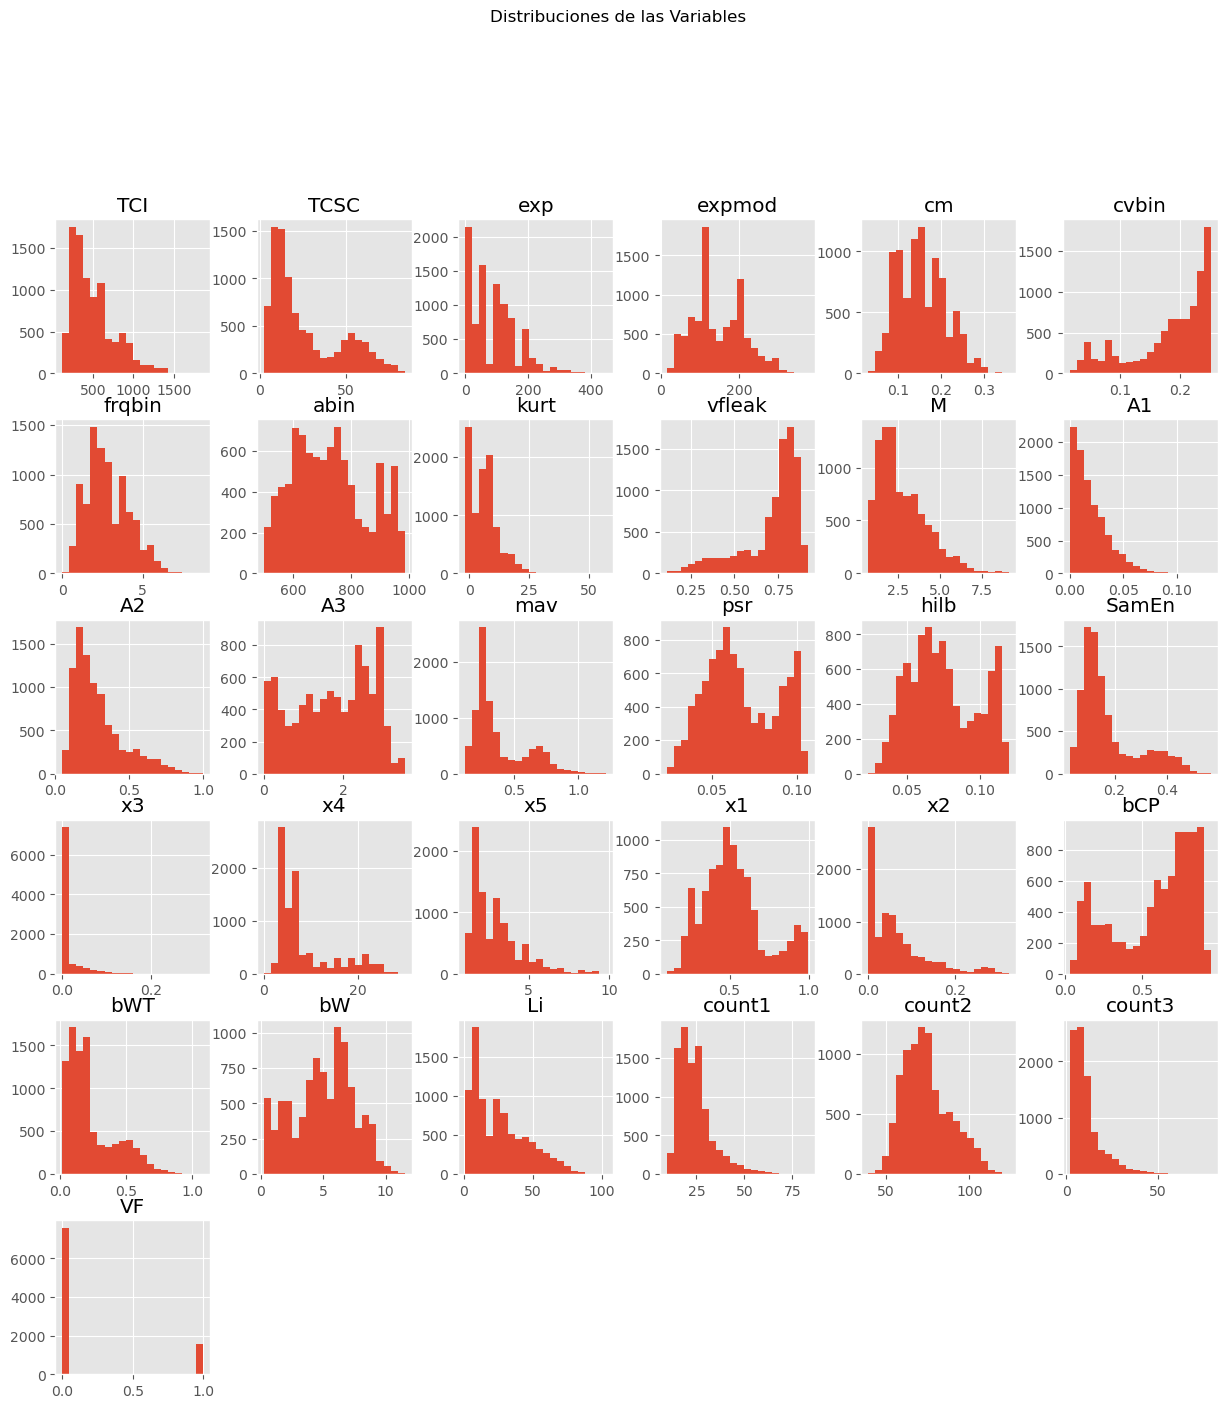

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograma de las variables
df.hist(bins=20, figsize=(15, 15))
plt.suptitle('Distribuciones de las Variables', y=1.02)
plt.show()

Con los gráficos vemos gráficamente entre que valores se encuentran las variables y en que intervalos hay mayor 
densidad de regirstros.

La variable objetivo (VF) tiene dos clases (0 y 1). Hay más casos de la clase 0; esto es normal en datos médicos ya 
que representan la normalidad; los datos de la clase 1 representan la fibrilación (es decir, son caso que representan la patología)

En cuanto a las variables predictoras:
- Asimetría a la derecha en variables como TCI, TCSC, exp, expmod muestran muchos valores bajos y pocos altos
- A3, x4 muestran valores distribuidos más uniformemente


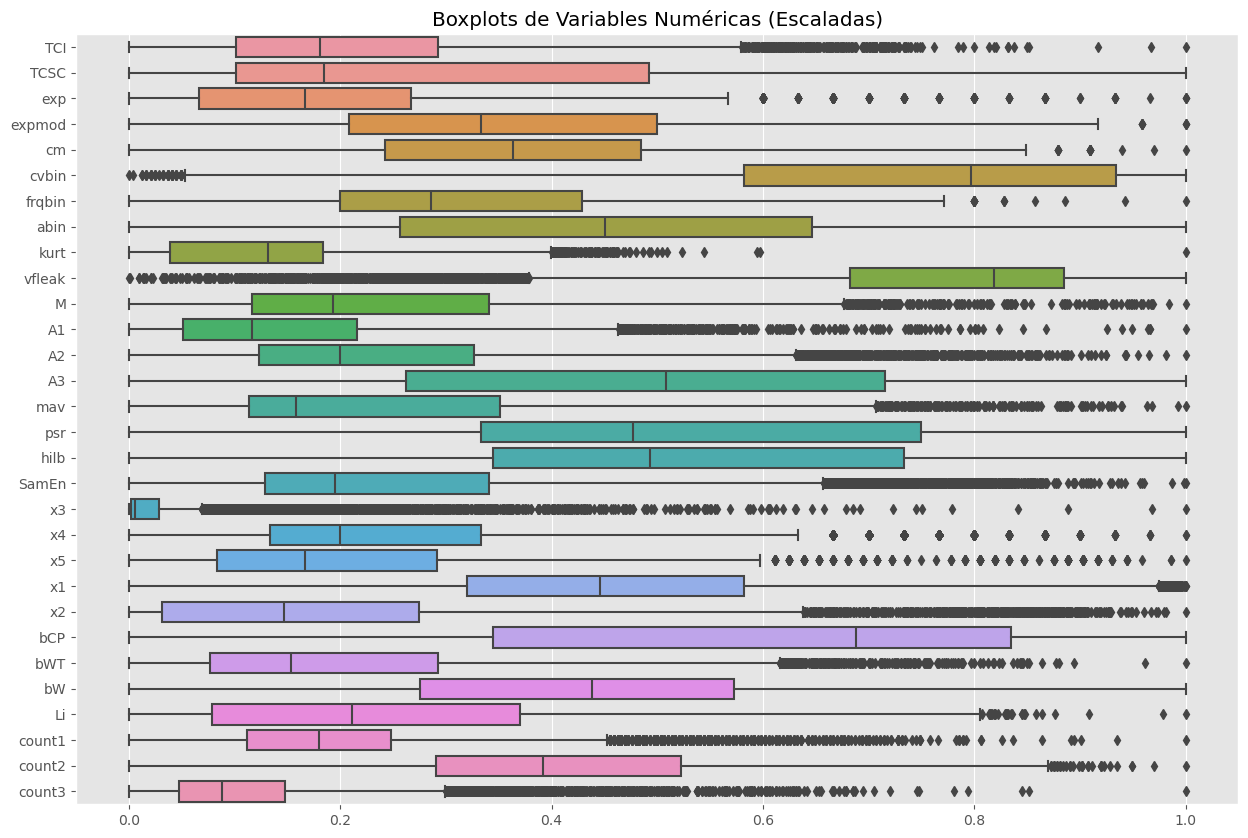

In [54]:
# 2. Boxplots para identificar atípicos
from sklearn.preprocessing import MinMaxScaler

# Visualizar boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled, orient='h')
plt.title('Boxplots de Variables Numéricas (Escaladas)')
plt.show()

En cuanto a la distribución:
- Hay variables como x3 o count3 que tienen poca variabilidad mientras otros
como A3 o bCP muestran valores más dispersos.
variables como M o hilb tienen la mediana casi en el centro de la caja lo que indica una distribución similar a ambos lados. 

En cuanto a valores atípicos:
- TCI, TCSC, x1 presentan una cantidad significativa de valores que se alejan del comportamiento general de los datos.
- Los valores atípicos pueden afectar al rendimiento del modelo.
- Al ser datos médicos podrían ser valores clinicamente relevantes con lo que debemos mantenerlos. Ya hemos realizado un escalado de los datos.

In [74]:
# Crear matriz de correlaciones
correlaciones = df.corr()
print("\nMatriz de correlaciones (redondeada a 2 decimales):")
print(df.corr().round(2))


Matriz de correlaciones (redondeada a 2 decimales):
         TCI  TCSC   exp  expmod    cm  cvbin  frqbin  abin  kurt  vfleak  \
TCI     1.00 -0.45 -0.01   -0.77 -0.28   0.03   -0.29 -0.08  0.33    0.38   
TCSC   -0.45  1.00  0.46    0.50  0.28   0.30    0.28 -0.25 -0.83   -0.86   
exp    -0.01  0.46  1.00    0.05  0.39   0.43    0.43 -0.47 -0.43   -0.47   
expmod -0.77  0.50  0.05    1.00  0.36   0.03    0.39  0.01 -0.36   -0.47   
cm     -0.28  0.28  0.39    0.36  1.00   0.66    0.97 -0.63 -0.28   -0.36   
cvbin   0.03  0.30  0.43    0.03  0.66   1.00    0.64 -0.97 -0.28   -0.35   
frqbin -0.29  0.28  0.43    0.39  0.97   0.64    1.00 -0.63 -0.28   -0.38   
abin   -0.08 -0.25 -0.47    0.01 -0.63  -0.97   -0.63  1.00  0.23    0.32   
kurt    0.33 -0.83 -0.43   -0.36 -0.28  -0.28   -0.28  0.23  1.00    0.67   
vfleak  0.38 -0.86 -0.47   -0.47 -0.36  -0.35   -0.38  0.32  0.67    1.00   
M       0.24 -0.46 -0.26   -0.32 -0.30  -0.24   -0.33  0.24  0.39    0.61   
A1     -0.12  0.06  0.0

In [72]:
# Solo las correlaciones con VF:
print("\nCorrelaciones con VF:")
print(df.corr()['VF'].sort_values(ascending=False))


Correlaciones con VF:
VF        1.000000
x4        0.843272
x3        0.786246
TCSC      0.760128
A2        0.746814
SamEn     0.745992
mav       0.744130
bWT       0.732240
x1        0.720480
count3    0.713230
count2    0.695716
hilb      0.687338
psr       0.664015
count1    0.622258
expmod    0.532623
Li        0.503092
exp       0.396708
frqbin    0.360266
cm        0.353583
cvbin     0.275047
x5        0.261021
A1        0.159832
abin     -0.252313
x2       -0.363928
TCI      -0.404197
M        -0.455326
kurt     -0.528579
A3       -0.613732
bW       -0.627163
bCP      -0.750196
vfleak   -0.833920
Name: VF, dtype: float64


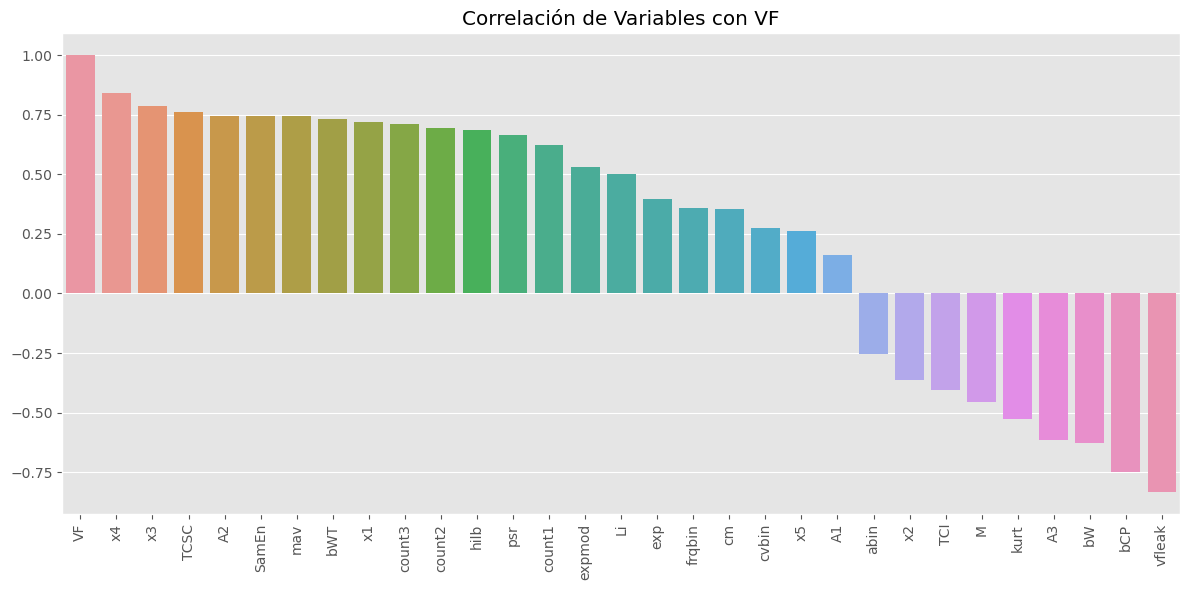

In [76]:

# Visualizar correlaciones con la variable objetivo
plt.figure(figsize=(12, 6))
correlaciones_vf = correlaciones['VF'].sort_values(ascending=False)
sns.barplot(x=correlaciones_vf.index, y=correlaciones_vf.values)
plt.xticks(rotation=90)
plt.title('Correlación de Variables con VF')
plt.tight_layout()
plt.show()

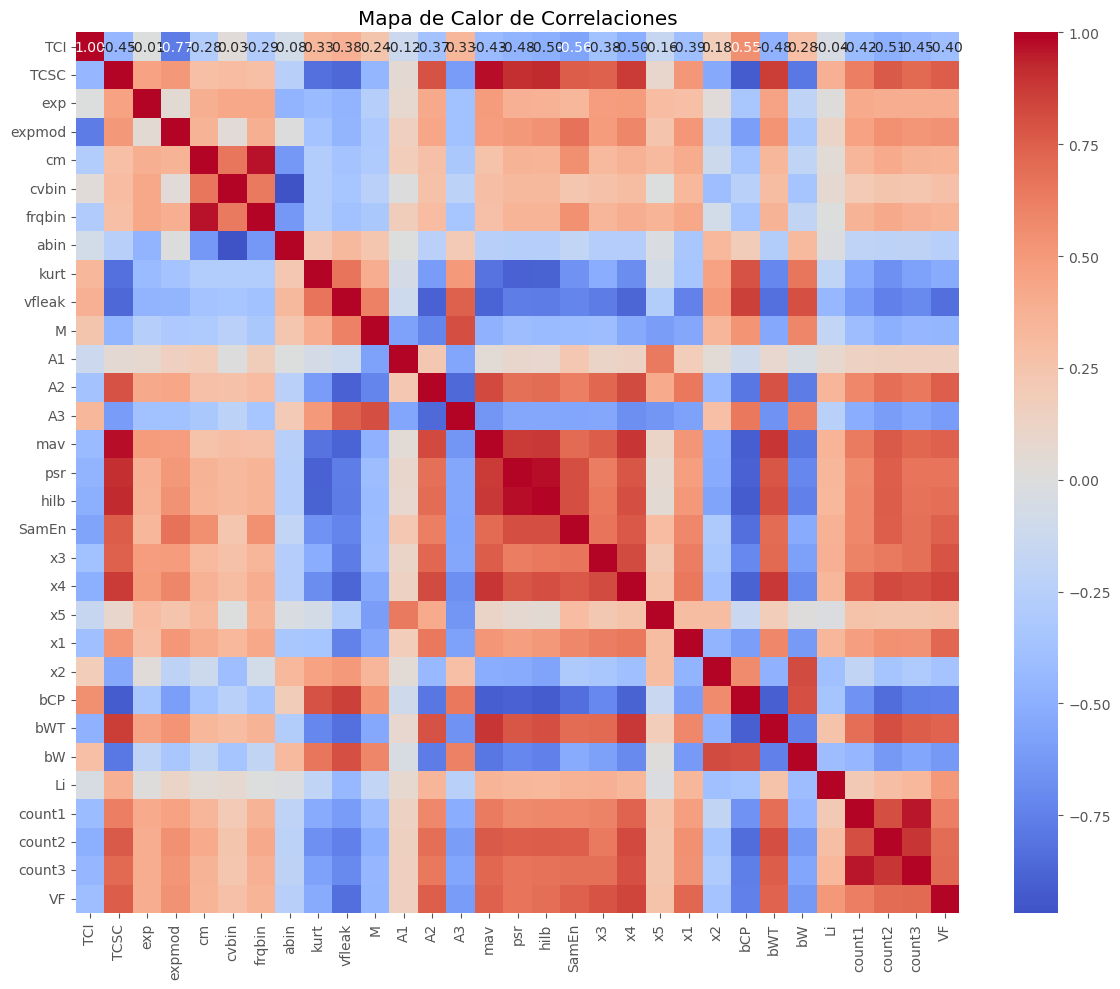

In [78]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()

Correlación con VF:
- Las variables más correlacionadas positivamente con VF son x4, x3, TCSC, A2, y SamEn.
- Las variables más correlacionadas negativamente son bCP, bWT, y vfLeak.
- Estas variables serán clave para nuestro modelo de clasificación.

Multicolinealidad:
Observamos correlaciones fuertes entre algunas variables prdictoras. Por ejemplo entre "mav" y "TCSC" existe una gran correlación (0,98). Dado que están tan relacionadas puede ocurrir redundancia aportando información similar al modelo. Seleccionamos TCSC ya que tiene mayor correlación con la variable objetivo VF.

Variables para el modelo:
**x4 (0.84), TCSC (0.76), A2 (0.75), bWT (0.73), SamEn (0.75), x1 (0.72), count3 (0.71), hilb (0.69)**
Estas variables proporcionarán una base sólida para el modelo de clasificación, maximizando la relevancia y minimizando la redundancia.

**Estudio de visualizaciones solo de las variables seleccionadas:**

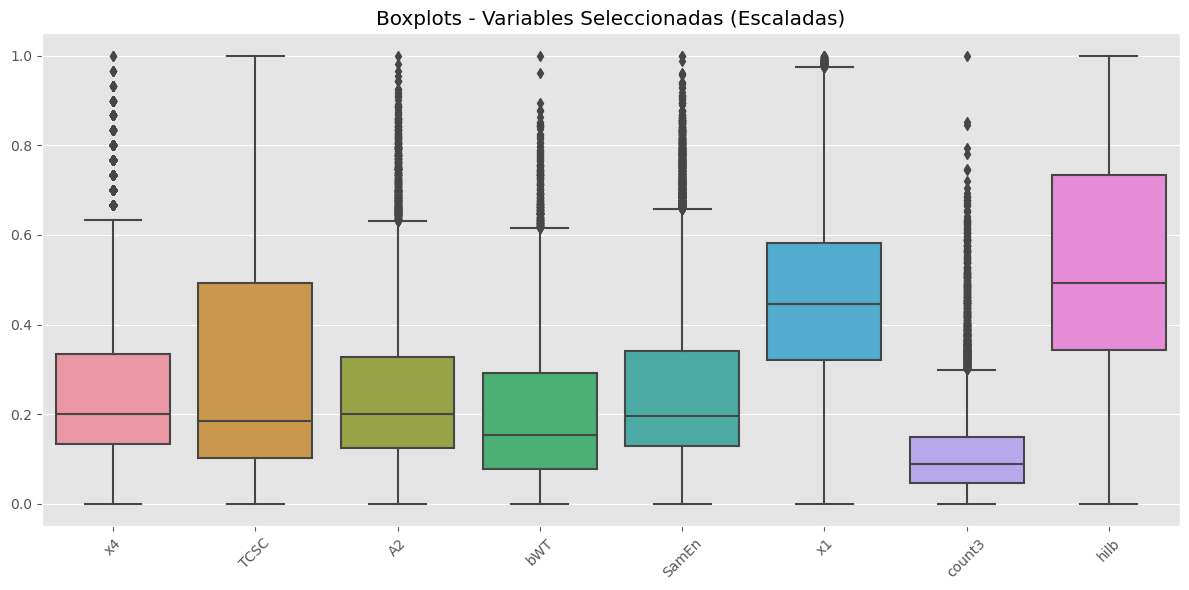

In [100]:
# 1. Seleccionar nuestras variables del df_scaled
variables_seleccionadas = ['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']  # sin VF porque no está en df_scaled

# 2. Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[variables_seleccionadas])
plt.xticks(rotation=45)
plt.title('Boxplots - Variables Seleccionadas (Escaladas)')
plt.tight_layout()
plt.show()

Observación de las variables seleccionadas para el modelado. Cada variable muestra patrones diferentes, es decir, cada una aporta información relevante para detectar la fibrilación ventricular.
Los valores atípicos que observamos son esperables en datos médicos y, como decidimos anteriormente, los mantendremos ya que podrían representar casos importantes de fibrilación ventricular.

# **Modelización**

Minimo accuracy de 85%

## **Separar variables predictoras y variable objetivo**

In [102]:
# Separar variables predictoras y objetivo
X = df_scaled[['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']]
y = df['VF']

In [114]:
# Dividir los datos (80% train, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [116]:
# Reserva de dataset para validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

División de los datos para Train y Test en un 80% y 20% respectivamente. Es una división estándar que proporciona
datos suficientes para entrenar y mantiene un conjunto de test representativo para evaluar el modelo.

Reservamos el 20% para validación y así ajustar hiperparámetros
Resultado:
Train: 60%
Validación: 20%
Test: 20%

In [118]:
# Verificar dimensiones
print("Dimensiones de los conjuntos:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

# Verificar distribución de clases
print("\nDistribución de clases:")
print("\nTrain:")
print(y_train.value_counts(normalize=True))
print("\nValidación:")
print(y_val.value_counts(normalize=True))
print("\nTest:")
print(y_test.value_counts(normalize=True))

Dimensiones de los conjuntos:
X_train: (5487, 8)
X_val: (1829, 8)
X_test: (1830, 8)
y_train: (5487,)
y_val: (1829,)
y_test: (1830,)

Distribución de clases:

Train:
VF
0    0.829233
1    0.170767
Name: proportion, dtype: float64

Validación:
VF
0    0.822307
1    0.177693
Name: proportion, dtype: float64

Test:
VF
0    0.839344
1    0.160656
Name: proportion, dtype: float64


**Dimensiones:**
X_train: (5487, 8) → 60% de los datos, 8 variables
X_val: (1829, 8) → 20% de los datos, 8 variables
X_test: (1830, 8) → 20% de los datos, 8 variables

**Distribución de clases (VF):**
Train: 82.9% clase 0, 17.1% clase 1
Validación: 82.2% clase 0, 17.8% clase 1
Test: 83.3% clase 0, 16.7% clase 1

## **Modelado**

Estrategia de Modelado: Iniciamos el modelado con modelos básicos para establecer líneas base de rendimiento, identificar los modelos que mejor rendimiento nos darán y optimizar recursos. Una vez revisados los modelos básicos procederemos a su optimización mediante Pipeline y GridSearch.
Modelos a evaluar: Regresión logística (Variable Objetivo = variable de clasificación binaria (0/1)), KNN, Randon Forest y XGBoost

In [122]:
# 1. Importar los modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [124]:
# 2. Crear diccionario de modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [126]:
# 3. Evaluar cada modelo
results = {}
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predecir en validación
    y_pred = model.predict(X_val)
    
    # Calcular accuracy
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy
    
    print(f"{name} - Accuracy: {accuracy:.4f}")

KNN - Accuracy: 0.9891
Logistic Regression - Accuracy: 0.9792
Random Forest - Accuracy: 0.9907
XGBoost - Accuracy: 0.9913


In [128]:
# Ver las primeras filas de nuestros conjuntos
print("X_train primeras filas:")
print(X_train.head())
print("\ny_train primeras filas:")
print(y_train.head())

# Ver información sobre el escalado
print("\nRango de valores en X_train:")
print(X_train.describe())

X_train primeras filas:
            x4      TCSC        A2       bWT     SamEn        x1    count3  \
1618  0.233333  0.061274  0.094263  0.186709  0.109344  0.416805  0.110571   
610   0.300000  0.786765  0.261910  0.352504  0.342981  0.198785  0.152991   
4173  0.200000  0.230395  0.213186  0.179283  0.214440  0.624012  0.102947   
4983  0.466667  0.826790  0.667653  0.229442  0.545060  0.898783  0.106686   
7464  0.233333  0.087418  0.291363  0.151869  0.169792  0.480574  0.110362   

          hilb  
1618  0.253247  
610   0.922078  
4173  0.584416  
4983  0.876571  
7464  0.305195  

y_train primeras filas:
1618    0
610     0
4173    0
4983    1
7464    0
Name: VF, dtype: int64

Rango de valores en X_train:
                x4         TCSC           A2          bWT        SamEn  \
count  5487.000000  5487.000000  5487.000000  5487.000000  5487.000000   
mean      0.277626     0.292831     0.252113     0.204691     0.271110   
std       0.211359     0.249586     0.177721     0.1726

In [130]:
# Ver las columnas que estamos usando
print("Columnas en X:")
print(X.columns)

Columnas en X:
Index(['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb'], dtype='object')


In [132]:
print("Tamaños de los conjuntos:")
print(f"Train: {len(X_train)}")
print(f"Validación: {len(X_val)}")
print(f"Test: {len(X_test)}")

Tamaños de los conjuntos:
Train: 5487
Validación: 1829
Test: 1830


In [134]:
from sklearn.model_selection import cross_val_score

# Probar con cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

KNN - CV Accuracy: 0.9880 (+/- 0.0039)
Logistic Regression - CV Accuracy: 0.9785 (+/- 0.0091)
Random Forest - CV Accuracy: 0.9878 (+/- 0.0037)
XGBoost - CV Accuracy: 0.9882 (+/- 0.0033)


Resultados del modelado básico:
- Los modelos muestran un accuracy sorprendentemente alto (>97%)
- Para validar estos resultados, aplicamos cross-validation con 5 folds, que confirma:
    - Rendimiento robusto en diferentes subconjuntos de datos
    - Baja variabilidad en los resultados (desviación estándar <1%)
- No hay señales de overfitting

Conclusiones:
Las variables predictoras selecionadas son altamente predictivas para detectar la fibrilación ventricular.

Próximos pasos:
- Optimizar los modelos con **Pipeline y GridSearch**
- Validación con el conjunto de datos data_onu.csv

In [136]:
# Crear el pipeline básico (estructura base para probar diferentes modelos e hiper parámetros)
pipe = Pipeline([('algoritmo', LogisticRegression())])

# Definir el grid con todos los modelos y sus hiper parámetros
grid = [
    # Logistic Regression
    {'algoritmo': [LogisticRegression()],
     'algoritmo__C': [0.1, 1, 10]},
    
    # Random Forest
    {'algoritmo': [RandomForestClassifier()],
     'algoritmo__max_depth': [5, 10, 15],
     'algoritmo__n_estimators': [50, 100, 200]},
    
    # XGBoost
    {'algoritmo': [XGBClassifier()],
     'algoritmo__max_depth': [5, 10, 20],
     'algoritmo__n_estimators': [50, 100, 200],
     'algoritmo__learning_rate': [0.01, 0.1]},
    
    # KNN
    {'algoritmo': [KNeighborsClassifier()],
     'algoritmo__n_neighbors': [5, 10, 15, 20]}
]

## **Optimización de hiper parámetros**
Aplicaremos dos métodos de búsqueda de hiperparámetros: GridSearch (búsqueda exhaustiva de todas las combinaciones) y RandomSearch (búsqueda aleatoria de combinaciones). Esto nos permitirá encontrar la mejor configuración de modelos y parámetros para nuestro problema de clasificación.

In [138]:
# 3. GridSearch
grid_search = GridSearchCV(estimator=pipe,
                         param_grid=grid,
                         cv=5,
                         scoring='accuracy',
                         verbose=1,
                         n_jobs=-1)
# Entrenar
modelo_grid = grid_search.fit(X_train, y_train)

# Ver resultados ordenados
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

Fitting 5 folds for each of 34 candidates, totalling 170 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__learning_rate,param_algoritmo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.344619,0.017967,0.016779,0.001236,"XGBClassifier(base_score=None, booster=None, c...",NaN,10.0,200.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.987250,0.986339,0.990884,0.992707,0.989061,0.989248,0.002330,1
29,0.590376,0.191521,0.054021,0.040691,"XGBClassifier(base_score=None, booster=None, c...",NaN,20.0,200.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.988160,0.987250,0.990884,0.992707,0.987238,0.989248,0.002185,2
25,0.274512,0.014469,0.016125,0.005320,"XGBClassifier(base_score=None, booster=None, c...",NaN,10.0,100.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.985428,0.986339,0.991796,0.992707,0.989061,0.989066,0.002877,3
10,1.096577,0.015048,0.032258,0.000869,RandomForestClassifier(),NaN,15.0,100.0,NaN,NaN,"{'algoritmo': RandomForestClassifier(), 'algor...",0.986339,0.988160,0.992707,0.989973,0.988149,0.989066,0.002153,4
24,0.194959,0.006549,0.012055,0.002232,"XGBClassifier(base_score=None, booster=None, c...",NaN,10.0,50.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.985428,0.986339,0.990884,0.992707,0.989061,0.988884,0.002723,5
22,0.228965,0.007590,0.016966,0.004141,"XGBClassifier(base_score=None, booster=None, c...",NaN,5.0,100.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.986339,0.987250,0.989973,0.992707,0.988149,0.988884,0.002258,6
28,0.224032,0.006668,0.013197,0.000493,"XGBClassifier(base_score=None, booster=None, c...",NaN,20.0,100.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.985428,0.986339,0.989973,0.993619,0.988149,0.988702,0.002912,7
27,0.152796,0.005737,0.012673,0.001065,"XGBClassifier(base_score=None, booster=None, c...",NaN,20.0,50.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.985428,0.986339,0.990884,0.991796,0.988149,0.988519,0.002481,8
11,2.212538,0.075162,0.075762,0.019710,RandomForestClassifier(),NaN,15.0,200.0,NaN,NaN,"{'algoritmo': RandomForestClassifier(), 'algor...",0.986339,0.987250,0.990884,0.989061,0.989061,0.988519,0.001584,9
23,0.422015,0.026900,0.018973,0.005689,"XGBClassifier(base_score=None, booster=None, c...",NaN,5.0,200.0,0.10,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.987250,0.987250,0.988149,0.991796,0.987238,0.988336,0.001765,10


Observación: Todos los modelos tienen un rendimiento muy alto (>97%) siendo XGBoost y Random Forest los que mejor
funcionan (con pequeñas diferencias): 

- Mejor modelo: XGBoost
    max_depth = 10
    n_estimators = 200
    learning_rate = 0.10
    Accuracy = 0.9892 (98.92%)
  
- Ranking de modelos:
XGBoost (98.92%)
    Random Forest (98.90%)
    KNN (98.79%)
    Logistic Regression (97.77%)

In [140]:
# 2. Random Search
random_search = RandomizedSearchCV(estimator=pipe,
                                param_distributions=grid,
                                n_iter=55,
                                cv=5,
                                scoring='accuracy',  # Cambiamos a accuracy
                                verbose=1,
                                n_jobs=-1)

# Entrenar
modelo_random = random_search.fit(X_train, y_train)

# Ver resultados ordenados
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score')

Fitting 5 folds for each of 34 candidates, totalling 170 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__C,param_algoritmo,param_algoritmo__n_estimators,param_algoritmo__max_depth,param_algoritmo__learning_rate,param_algoritmo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.371525,0.014666,0.016491,0.001309,NaN,"XGBClassifier(base_score=None, booster=None, c...",200.0,10.0,0.10,NaN,"{'algoritmo__n_estimators': 200, 'algoritmo__m...",0.987250,0.986339,0.990884,0.992707,0.989061,0.989248,0.002330,1
29,0.365649,0.023348,0.019708,0.008542,NaN,"XGBClassifier(base_score=None, booster=None, c...",200.0,20.0,0.10,NaN,"{'algoritmo__n_estimators': 200, 'algoritmo__m...",0.988160,0.987250,0.990884,0.992707,0.987238,0.989248,0.002185,2
25,0.240728,0.011509,0.016080,0.001801,NaN,"XGBClassifier(base_score=None, booster=None, c...",100.0,10.0,0.10,NaN,"{'algoritmo__n_estimators': 100, 'algoritmo__m...",0.985428,0.986339,0.991796,0.992707,0.989061,0.989066,0.002877,3
24,0.159128,0.012344,0.012049,0.001485,NaN,"XGBClassifier(base_score=None, booster=None, c...",50.0,10.0,0.10,NaN,"{'algoritmo__n_estimators': 50, 'algoritmo__ma...",0.985428,0.986339,0.990884,0.992707,0.989061,0.988884,0.002723,4
22,0.228077,0.007411,0.020310,0.007177,NaN,"XGBClassifier(base_score=None, booster=None, c...",100.0,5.0,0.10,NaN,"{'algoritmo__n_estimators': 100, 'algoritmo__m...",0.986339,0.987250,0.989973,0.992707,0.988149,0.988884,0.002258,5
28,0.243673,0.004135,0.013517,0.000959,NaN,"XGBClassifier(base_score=None, booster=None, c...",100.0,20.0,0.10,NaN,"{'algoritmo__n_estimators': 100, 'algoritmo__m...",0.985428,0.986339,0.989973,0.993619,0.988149,0.988702,0.002912,6
11,2.520554,0.101106,0.070741,0.006883,NaN,RandomForestClassifier(),200.0,15.0,NaN,NaN,"{'algoritmo__n_estimators': 200, 'algoritmo__m...",0.985428,0.987250,0.991796,0.990884,0.988149,0.988701,0.002344,7
10,1.966297,0.376454,0.073533,0.039934,NaN,RandomForestClassifier(),100.0,15.0,NaN,NaN,"{'algoritmo__n_estimators': 100, 'algoritmo__m...",0.985428,0.987250,0.990884,0.989973,0.989973,0.988701,0.002041,7
27,0.159230,0.004806,0.012592,0.001023,NaN,"XGBClassifier(base_score=None, booster=None, c...",50.0,20.0,0.10,NaN,"{'algoritmo__n_estimators': 50, 'algoritmo__ma...",0.985428,0.986339,0.990884,0.991796,0.988149,0.988519,0.002481,9
8,3.315690,0.608828,0.111081,0.054449,NaN,RandomForestClassifier(),200.0,10.0,NaN,NaN,"{'algoritmo__n_estimators': 200, 'algoritmo__m...",0.985428,0.987250,0.992707,0.989061,0.988149,0.988519,0.002414,10


In [ ]:
Coincide con GridSearch en el mejor modelo (XGBoost) con los mismos parámetros y el ranking es muy similar.
Estos resultados confirman que el modelo es robusto y que no hay diferencias significativas.

In [144]:
# Mejor modelo y parámetros para GridSearch
print("Mejor modelo:")
print(grid_search.best_estimator_)
print("\nMejores parámetros:")
print(grid_search.best_params_)
print("\nMejor score:", grid_search.best_score_)

# Mejor modelo y parámetros para RandomSearch
print("\nResultados RandomSearch:")
print("Mejor modelo:")
print(random_search.best_estimator_)
print("\nMejores parámetros:")
print(random_search.best_params_)
print("\nMejor score:", random_search.best_score_)

Mejor modelo:
Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n

In [146]:
# Resumen de resultados
print("=== GridSearch ===")
print("Modelo: XGBoost")
print("Parámetros principales:")
print(f"- n_estimators: {grid_search.best_params_['algoritmo__n_estimators']}")
print(f"- max_depth: {grid_search.best_params_['algoritmo__max_depth']}")
print(f"- learning_rate: {grid_search.best_params_['algoritmo__learning_rate']}")
print(f"Accuracy: {grid_search.best_score_:.4f}")

print("\n=== RandomSearch ===")
print("Modelo: XGBoost")
print("Parámetros principales:")
print(f"- n_estimators: {random_search.best_params_['algoritmo__n_estimators']}")
print(f"- max_depth: {random_search.best_params_['algoritmo__max_depth']}")
print(f"- learning_rate: {random_search.best_params_['algoritmo__learning_rate']}")
print(f"Accuracy: {random_search.best_score_:.4f}")

=== GridSearch ===
Modelo: XGBoost
Parámetros principales:
- n_estimators: 200
- max_depth: 10
- learning_rate: 0.1
Accuracy: 0.9892

=== RandomSearch ===
Modelo: XGBoost
Parámetros principales:
- n_estimators: 200
- max_depth: 10
- learning_rate: 0.1
Accuracy: 0.9892


### Interpretación de los parámetros del mejor modelo:

1. **n_estimators: 200**
   - Número de árboles de decisión que se crean
   - Más árboles = modelo más robusto pero más lento
   - 200 árboles proporcionan un buen balance entre rendimiento y tiempo

2. **max_depth: 10**
   - Profundidad máxima de cada árbol
   - Controla la complejidad del modelo
   - Valor 10 permite capturar relaciones complejas sin sobreajustar

3. **learning_rate: 0.1**
   - Tasa de aprendizaje del modelo
   - Controla cuánto se ajusta el modelo en cada paso
   - 0.1 es un valor estándar que permite un aprendizaje estable

4. **Accuracy: 0.9892**
    - El modelo acierta el 98.92% de las predicciones
    - Rendimiento muy alto para detectar fibrilación ventricular
    - Consistente entre GridSearch y RandomSearch

## **Validación final**
Validación final con data_onu.csv

In [148]:
# 1. Cargar datos_onu.csv
datos_onu = pd.read_csv('/Users/maruxamoreiraperez/Python/MaruPython/clases julio/modulo 7/case to be solve/supervisado/data_onu.csv')

In [152]:
datos_onu.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,438.42,46.800,120,120,0.099658,0.16016,1.75,800,0.153170,0.58320,...,0.53153,0.003338,0.354,0.29044,1.6479,12.889,23.50,78.75,10.9500,0
1,449.10,46.467,60,120,0.119590,0.15713,1.75,805,-0.053068,0.60206,...,0.56449,0.002208,0.224,0.47144,1.7700,10.418,21.25,83.75,10.7210,0
2,466.82,49.533,90,135,0.099658,0.16490,1.75,792,-0.159920,0.58141,...,0.33149,0.002520,0.270,0.57652,2.0752,18.861,18.25,83.25,9.5106,0
3,549.38,52.600,120,120,0.089692,0.17177,1.75,780,-0.399490,0.59277,...,0.25013,0.001687,0.264,0.56407,1.9531,14.784,22.00,86.75,11.7990,0
4,426.55,56.533,135,105,0.119590,0.18101,2.25,763,-0.430150,0.51779,...,0.49224,0.001386,0.242,0.45114,1.4648,12.842,28.75,78.75,13.5370,0


### **EDA dataset validación**

In [154]:
# Comprobar estructura básica
print("Forma del dataset:", datos_onu.shape)
print("\nColumnas presentes:")
print(datos_onu.columns)

# Verificar valores nulos
print("\nValores nulos:")
print(datos_onu.isnull().sum())

Forma del dataset: (200, 31)

Columnas presentes:
Index(['TCI', 'TCSC', 'exp', 'expmod', 'cm', 'cvbin', 'frqbin', 'abin', 'kurt',
       'vfleak', 'M', 'A1', 'A2', 'A3', 'mav', 'psr', 'hilb', 'SamEn', 'x3',
       'x4', 'x5', 'x1', 'x2', 'bCP', 'bWT', 'bW', 'Li', 'count1', 'count2',
       'count3', 'VF'],
      dtype='object')

Valores nulos:
TCI       0
TCSC      0
exp       0
expmod    0
cm        0
cvbin     0
frqbin    0
abin      0
kurt      0
vfleak    0
M         0
A1        0
A2        0
A3        0
mav       0
psr       0
hilb      0
SamEn     0
x3        0
x4        0
x5        0
x1        0
x2        0
bCP       0
bWT       0
bW        0
Li        0
count1    0
count2    0
count3    0
VF        0
dtype: int64


In [156]:
# Estadísticas descriptivas de las variables que usamos
print("\nEstadísticas de las variables predictoras:")
print(datos_onu[['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']].describe())

# Distribución de la variable objetivo
print("\nDistribución de VF:")
print(datos_onu['VF'].value_counts(normalize=True))


Estadísticas de las variables predictoras:
               x4        TCSC          A2         bWT       SamEn          x1  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     7.810000   25.788999    0.268852    0.225257    0.177294    0.505805   
std      5.923626   19.139260    0.149338    0.188895    0.113777    0.196176   
min      2.000000    3.733300    0.072710    0.021103    0.025926    0.161250   
25%      4.000000   10.183250    0.160697    0.093527    0.098832    0.356935   
50%      5.000000   17.567000    0.230115    0.167475    0.135500    0.475595   
75%      8.000000   40.117000    0.332873    0.290560    0.226025    0.616090   
max     26.000000   75.867000    0.819100    1.072500    0.497060    0.982440   

           count3        hilb  
count  200.000000  200.000000  
mean    10.525591    0.074682  
std      6.979614    0.022602  
min      2.170700    0.033125  
25%      5.659175    0.054375  
50%      8.548750    0.073125  
75

### **Preparación de data_onu para la validación final**
Preparamos datos_onu seleccionando las mismas variables y escalándolas para que sean 
comparables con los datos de entrenamiento.

In [186]:
# Seleccionar las variables y escalar
variables = ['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']
X_onu = datos_onu[variables]
scaler = MinMaxScaler()
scaler.fit(X_onu)
X_onu_scaled = scaler.transform(X_onu)

# Comprobar el escalado
print("Forma de X_onu_scaled:", X_onu_scaled.shape)
print("\nRango de valores (debe estar entre 0 y 1):")
print("Min:", X_onu_scaled.min())
print("Max:", X_onu_scaled.max())

Forma de X_onu_scaled: (200, 8)

Rango de valores (debe estar entre 0 y 1):
Min: 0.0
Max: 1.0000000000000002


### **Validación**

In [188]:
y_onu = datos_onu['VF']
pred_onu = grid_search.best_estimator_.predict(X_onu_scaled)

print("=== Validación Final (datos_onu) ===")
print(f"Accuracy: {accuracy_score(y_onu, pred_onu):.4f}")

=== Validación Final (datos_onu) ===
Accuracy: 0.9800


El Accuracy para la validación con data_onu es del 98%, muy similar al rendimiento que obtuvimos en train (98,92%) y con el cross-validation (98,8%).
El modelo es fiable y robusto en diferentes conjuntos de datos y las variables seleccionadas explican bien la Variable Objetiva.

# **Predicción**

Aplicar el modelo seleccionado a estas dos nuevas obs:

In [196]:
Pred_new1 = pd.DataFrame({"TCI":[549.38], "TCSC":[52.6000], "exp":[120], "expmod":[120], "cm":[0.089692], "cvbin":[0.171770], "frqbin":[1.75], "abin":[780], 
                         "kurt":[-0.399490], "vfleak":[0.59277], "M":[1.70170],"A1":[0.000000], "A2":[0.519410],"A3":[0.812570], "mav":[0.71385],
                         "psr":[0.073125],"hilb":[0.089375], "SamEn":[0.127430], "x3":[0.011373],"x4":[15],"x5":[1.8930],"x1":[0.25013],
                         "x2":[0.001687], "bCP":[0.264], "bWT":[0.564070], "bW":[1.95310], "Li":[14.7840], "count1":[22.00], "count2":[86.75], "count3":[11.7990]})


In [198]:
Pred_new2 = pd.DataFrame({"TCI":[321.03], "TCSC":[55.5330], "exp":[90], "expmod":[195], "cm":[0.259110], "cvbin":[0.246020],
                         "frqbin":[5.25], "abin":[565], "kurt":[-0.179400], "vfleak":[0.57562], "M":[1.66690],
                         "A1":[0.020230], "A2":[0.390060],"A3":[0.984230], "mav":[0.60446],
                         "psr":[0.095625],"hilb":[0.109380], "SamEn":[0.382610], "x3":[0.089249],"x4":[24],"x5":[2.7479],
                         "x1":[0.86150],"x2":[0.005039], "bCP":[0.082], "bWT":[0.386200],
                         "bW":[2.86870], "Li":[28.9930], "count1":[38.50], "count2":[97.75], "count3":[25.5580]})

Preparamos las nuevas observaciones seleccionando las variables predictoras y 
normalizándolas para que sean compatibles con nuestro modelo

In [200]:
# Seleccionamos solo las variables que usamos para ambas observaciones
variables = ['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']
X_new1 = Pred_new1[variables]
X_new2 = Pred_new2[variables]

# Verificamos que tenemos las variables correctas
print("Variables en X_new1:", X_new1.columns.tolist())
print("Variables en X_new2:", X_new2.columns.tolist())

Variables en X_new1: ['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']
Variables en X_new2: ['x4', 'TCSC', 'A2', 'bWT', 'SamEn', 'x1', 'count3', 'hilb']


In [202]:
# Escalamos los datos nuevos usando el mismo scaler
X_new1_scaled = scaler.transform(X_new1)
X_new2_scaled = scaler.transform(X_new2)

# Verificamos que el escalado está en el rango correcto
print("\nRango de valores X_new1_scaled:")
print("Min:", X_new1_scaled.min())
print("Max:", X_new1_scaled.max())

print("\nRango de valores X_new2_scaled:")
print("Min:", X_new2_scaled.min())
print("Max:", X_new2_scaled.max())


Rango de valores X_new1_scaled:
Min: 0.108233173808741
Max: 0.6774461867338013

Rango de valores X_new2_scaled:
Min: 0.3472494214839875
Max: 0.9166666666666666


In [206]:
# Realizamos predicciones sobre las nuevas observaciones
pred1 = grid_search.best_estimator_.predict(X_new1_scaled)
pred2 = grid_search.best_estimator_.predict(X_new2_scaled)

# Mostramos los resultados de forma clara
print("\nResultados de las predicciones:")
print("-" * 50)
print(f"Observación 1: {'Fibrilación Ventricular - Desfibrilación Recomendada' if pred1[0] == 1 else 'Ritmo Normal - No Requiere Intervención'}")
print(f"Observación 2: {'Fibrilación Ventricular - Desfibrilación Recomendada' if pred2[0] == 1 else 'Ritmo Normal - No Requiere Intervención'}")
print("-" * 50)


Resultados de las predicciones:
--------------------------------------------------
Observación 1: Ritmo Normal - No Requiere Intervención
Observación 2: Fibrilación Ventricular - Desfibrilación Recomendada
--------------------------------------------------
